In [1]:
import pandas as pd
# Custom Helper Functions
from helper_functions import print_boxed_text, save_boxed_text_to_file, phi_coefficient, one_hot_encode, standardize_numeric

In [2]:
dataset_4 = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_1.csv").drop(columns=["Unnamed: 0"])

In [3]:
dataset_4

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Demographics_Gender_Cleaned_Woman,Demographics_Trans_Cleaned_0.0,Demographics_Trans_Cleaned_1.0,Demographics_Age_Cleaned_18-29,Demographics_Age_Cleaned_30-39,Demographics_Age_Cleaned_40-49,Demographics_Age_Cleaned_50-59,Demographics_Age_Cleaned_60-69,Demographics_Age_Cleaned_70-79,Demographics_Age_Cleaned_80+
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,0,0,0,0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,0,0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,1,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,0,0,0,0,1,0,0,0
6027,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,0,0,1,0,0,0,0,0
6028,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,1,0,0,1,0,0,0,0,0
6029,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1,0,0


In [4]:
#Drop skewed features
def drop_skewed_features(df, threshold=0.5):
    """
    Drop features that are skewed towards 0 or 1.
    
    Parameters:
        df (DataFrame): The input DataFrame with binary features.
        threshold (float): The skewness threshold. Features with skewness above this value will be dropped.
        
    Returns:
        DataFrame: A new DataFrame with skewed features removed.
    """
    lines = ["Dropped Skewed Features"]
    is_title = [True]
    
    dropped_features = []
    
    for col in df.columns:
        # Calculate the skewness for each feature
        skewness = df[col].mean()
        
        # Check if the feature is skewed towards 0 or 1
        if skewness > threshold or skewness < (1 - threshold):
            line = f"Dropping {col} with skewness {skewness:.4f}"
            lines.append(line)
            is_title.append(False)
            dropped_features.append(col)
            
    # Drop the skewed features
    df_dropped = df.drop(columns=dropped_features)
    
    print_boxed_text(lines, is_title)
    
    return df_dropped


threshold = 0.75  #Setting this to a very conservative 95% threshold would be good to discuss this as a team
dataset_4_unskewed = drop_skewed_features(dataset_4, threshold)


┌────────────────────────────────────────────────────────────────────────────────────────────────────────┐
├────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                        Dropped Skewed Features                                         │
├────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                                                        │
│ Dropping Symptom_Memory_short with skewness 0.9242                                                     │
│ Dropping Symptom_Memory_no_new_memories with skewness 0.0875                                           │
│ Dropping Symptom_Memory_forget_tasks with skewness 0.1380                                              │
│ Dropping Symptom_Memory_other with skewness 0.1200                                                     │
│ Dropping Symptom_Cognitive_Function

In [5]:
dataset_4_unskewed

,Symptom_Memory_long,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Speech_difficulty_finding_words,Symptom_Speech_difficulty_communicating_verbally,Symptom_Speech_difficulty_reading_processing_text,Symptom_Speech_difficulty_understanding_others_speech,Symptom_Headaches_behind_eyes,...,Symptom_Gastrointestinal_feeling_full_quickly_eating,Symptom_Gastrointestinal_abdominal_pain,Symptom_SkinAllergy_itchy_skin,FAS,Physical_PEM_Severity,Cognitive_PEM_Severity,FAS_cat_Fatigue,FAS_cat_Minimal/No Fatigue,HasPeriods_Yes,Demographics_Age_Cleaned_40-49
0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.305556,0.5,0.5,0,1,0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0.583333,0.9,0.7,1,0,0,1
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0.305556,0.8,0.0,0,1,0,1
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0.277778,0.7,0.4,0,1,1,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0.305556,1.0,0.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0.638889,0.8,0.6,1,0,0,0
6027,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0,0,1,0.472222,1.0,0.9,1,0,0,0
6028,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1,1,0,0.666667,0.8,0.7,1,0,1,0
6029,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0.250000,0.0,0.0,0,1,0,0


In [6]:
# Initialize an empty dataframe to store phi values
phi_values = pd.DataFrame(index=dataset_4_unskewed.columns, columns=dataset_4_unskewed.columns)

# Calculate phi values
for col1 in dataset_4_unskewed.columns:
    for col2 in dataset_4_unskewed.columns:
        contingency_table = pd.crosstab(dataset_4_unskewed[col1], dataset_4_unskewed[col2])
        phi = phi_coefficient(contingency_table)
        phi_values.loc[col1, col2] = phi

# Convert to float
phi_values = phi_values.astype(float)

threshold = 0.4  # I decided to set this to 0.5 just based off what feels right, would be interesting to get some clinical input on this.
to_drop = []

for col1 in dataset_4_unskewed.columns:
    for col2 in dataset_4_unskewed.columns:
        if col1 >= col2:  # This ensures each pair is only considered once
            continue
        if (col1 in phi_values.index) and (col2 in phi_values.columns):
            phi_value = abs(phi_values.loc[col1, col2])
            if phi_value > threshold:
                to_drop.append((col1, col2, phi_value))

# Sort the list so that the same columns are dropped each time
to_drop.sort(key=lambda x: x[2], reverse=True)  # Sort by phi_value

dropped_columns = set()
lines = ["Dropped Columns and Their Phi Coefficients"]
is_title = [True]
for col1, col2, phi_value in to_drop:
    if col1 not in dropped_columns and col2 not in dropped_columns:
        lines.append(f"Dropping column '{col1}' which has a phi coefficient of {phi_value} with '{col2}'")
        is_title.append(False)
        dropped_columns.add(col1)
print_boxed_text(lines, is_title)

dataset_4_drop_corr = dataset_4_unskewed.drop(columns=dropped_columns)


┌────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                     Dropped Columns and Their Phi Coefficients                                                                     │
├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                                                                                                                                                                    │
│ Dropping column 'Cognitive_PEM_Severity' which has a phi coefficient of 0.745792426

In [7]:
dataset_4_drop_corr

,Symptom_Memory_long,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Speech_difficulty_understanding_others_speech,Symptom_Headaches_behind_eyes,Symptom_Headaches_stiff_neck,Symptom_Headaches_brain_pressure,Symptom_Headaches_diffuse,Symptom_Headaches_temples,Symptom_Headaches_after_mental_exertion,...,Symptom_Eye_Vision_sensitivity_to_light,Symptom_Eye_Vision_dry_eyes,Symptom_Eye_Vision_eye_pressure_pain,Symptom_Eye_Vision_other_eye_issues,Symptom_Gastrointestinal_feeling_full_quickly_eating,Symptom_Gastrointestinal_abdominal_pain,Physical_PEM_Severity,FAS_cat_Minimal/No Fatigue,HasPeriods_Yes,Demographics_Age_Cleaned_40-49
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.5,1,0,0
1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,0,0,0.9,0,0,1
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0.8,1,0,1
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,1,1,0.7,1,1,1
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,1.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1,1,1,0,0,0,0.8,0,0,0
6027,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.0,0,0,0
6028,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,0,0,0,1,1,0.8,0,1,0
6029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0.0,1,0,0


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d

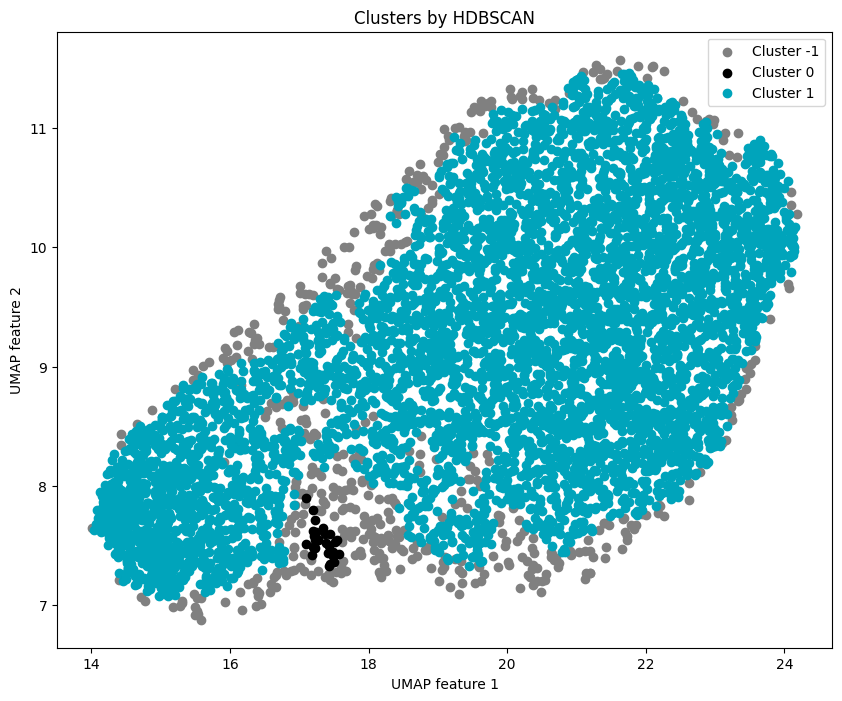

In [8]:
import pandas as pd
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt

# Step 1: Load your data
# Replace this with your actual data loading method
# data = pd.read_csv('your_data.csv')

# Step 2: Apply UMAP
umap_model = umap.UMAP(random_state=42)
data_umap = umap_model.fit_transform(dataset_4_drop_corr)

# Step 3: Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=19)
cluster_labels = clusterer.fit_predict(data_umap)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 8))
unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    if label == -1:
        color = 'grey'  # Noise points in grey
    else:
        color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
    plt.scatter(data_umap[cluster_labels == label, 0],
                data_umap[cluster_labels == label, 1],
                c=[color], label=f'Cluster {label}')
plt.title('Clusters by HDBSCAN')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.legend()
plt.show()

# Step 5: Save the cluster labels
# Replace this with your actual saving method
dataset_4_drop_corr['cluster'] = cluster_labels


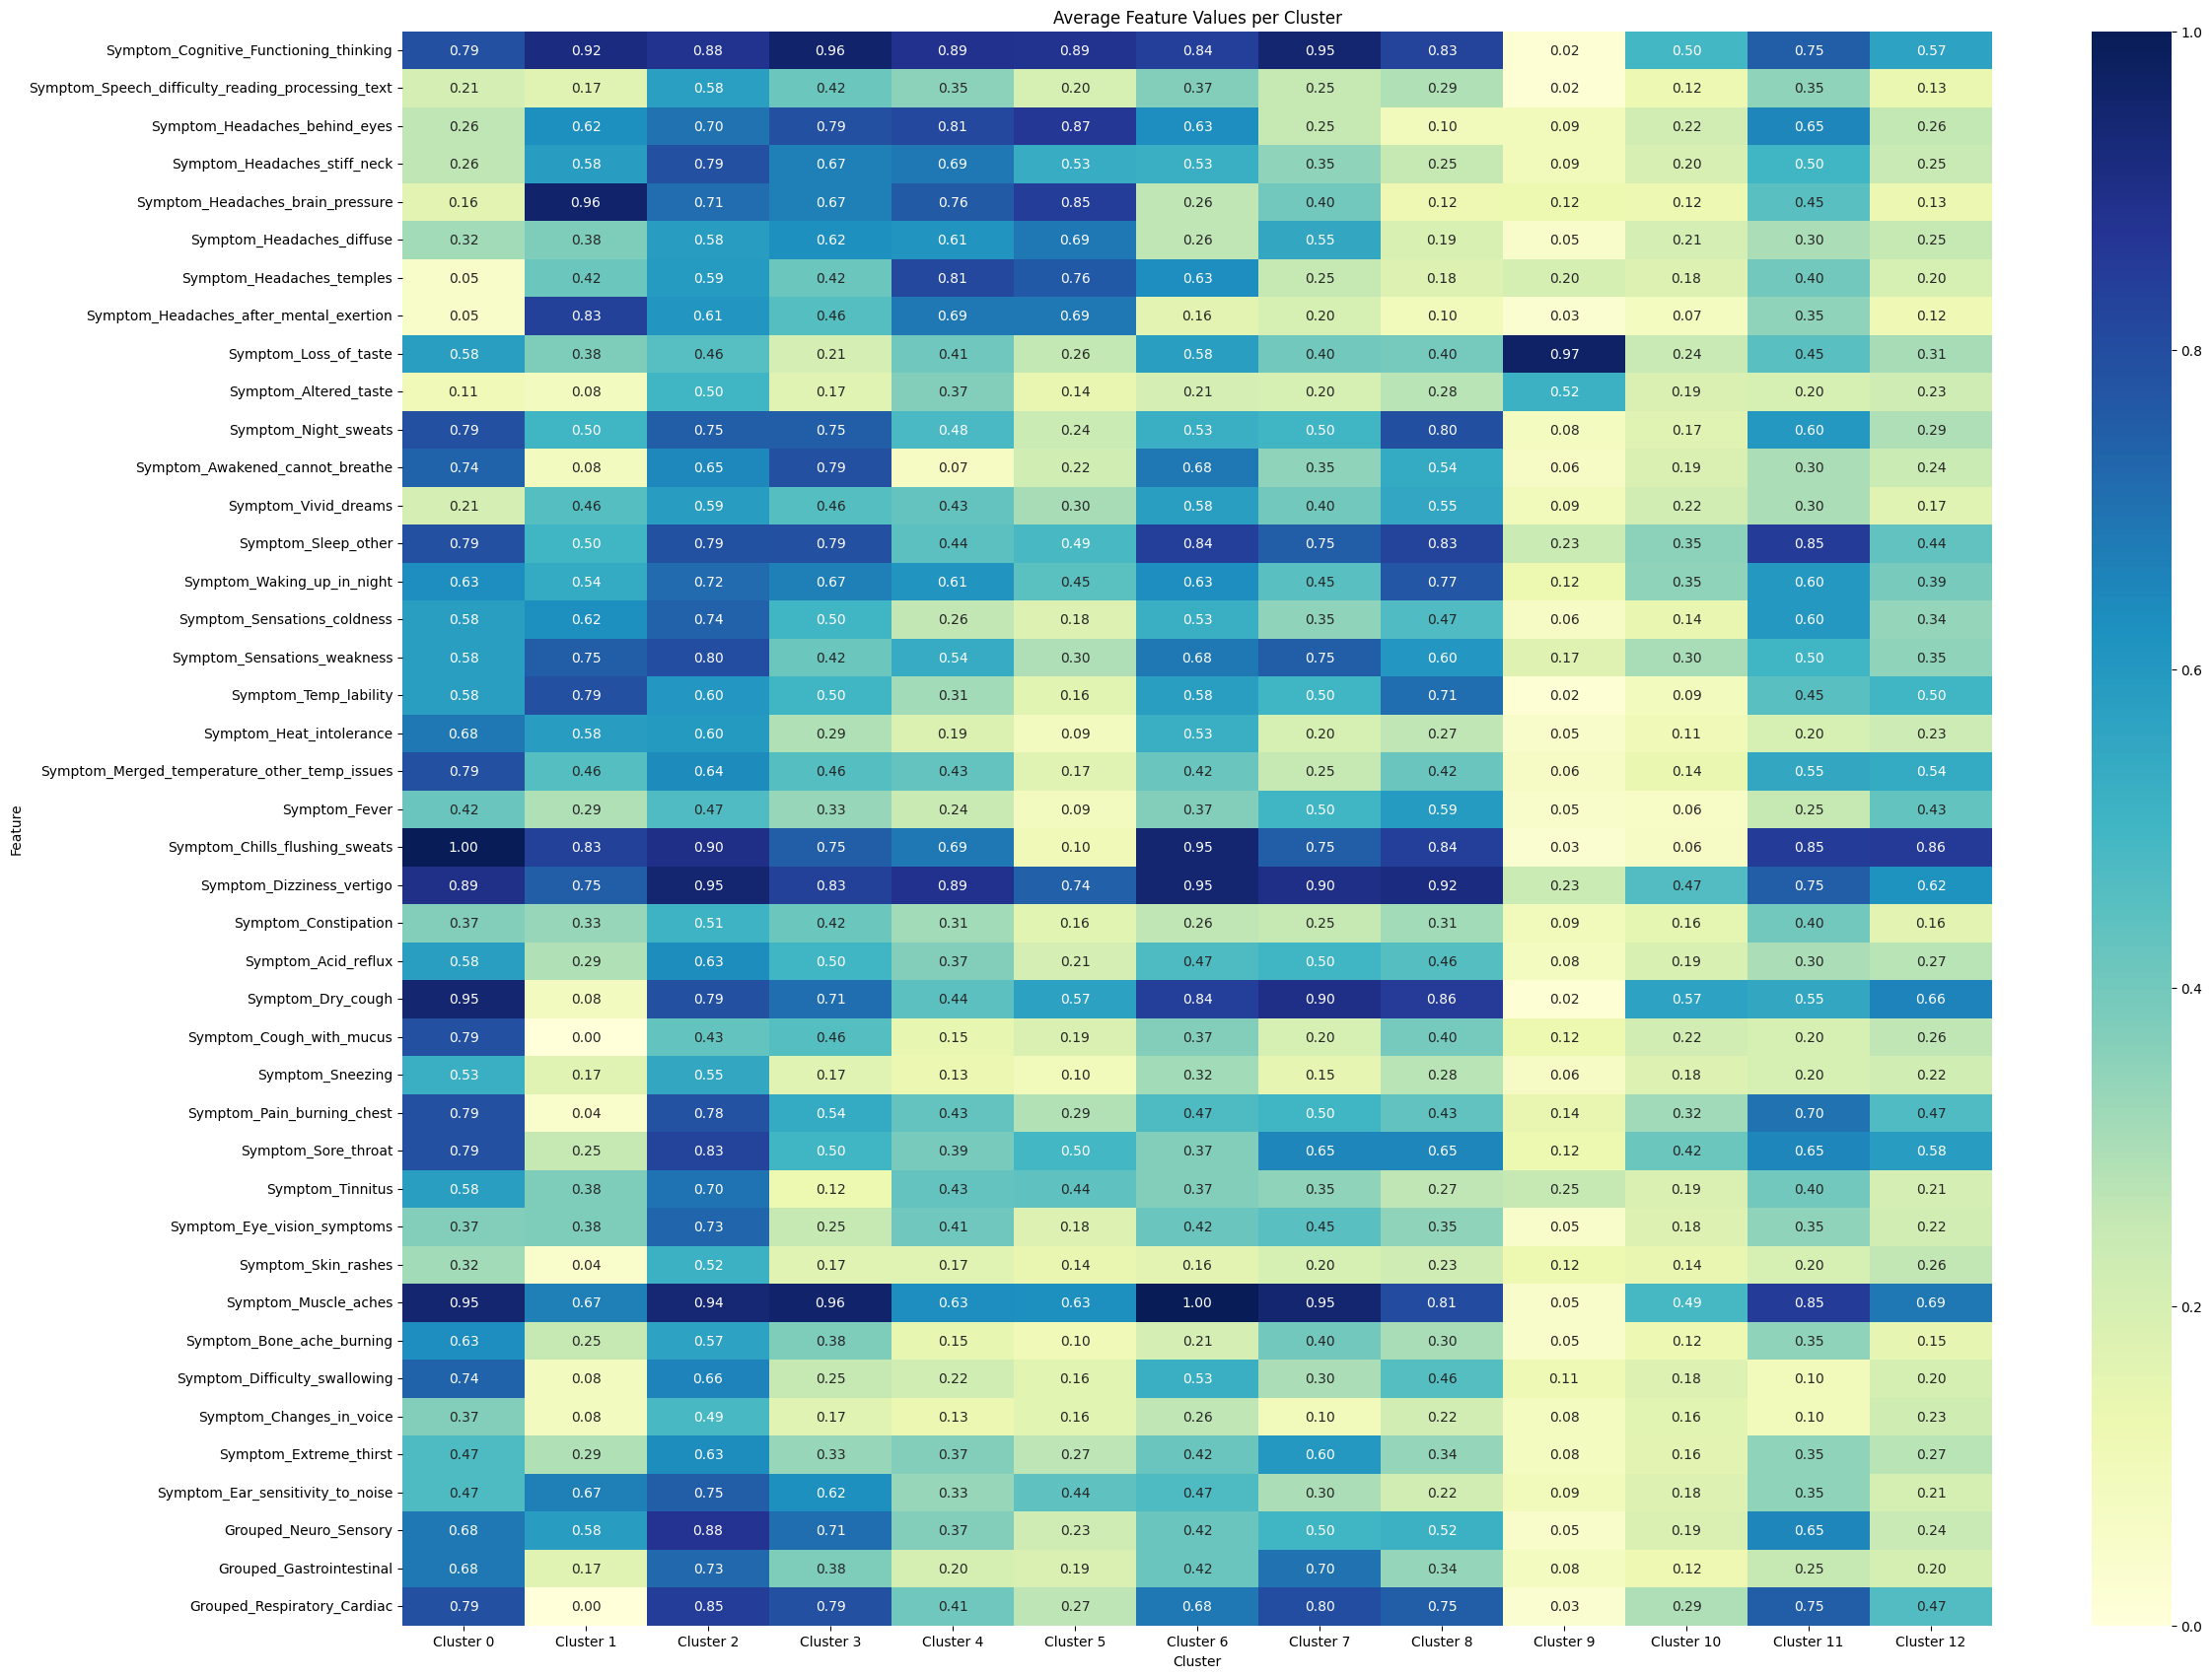

In [9]:
import seaborn as sns

def plot_cluster_averages(data, cluster_labels):
    """
    Compute and plot the average values of each column for each cluster with clusters on the x-axis,
    excluding the 'Cluster' column.

    :param data: Pandas DataFrame containing your dataset.
    :param cluster_labels: Array or list of cluster labels.
    """
    # Creating a new DataFrame to store averages
    cluster_averages = pd.DataFrame()

    # Calculate averages for each cluster
    for label in np.unique(cluster_labels):
        # Skip noise points
        if label == -1:
            continue
        # Exclude the 'Cluster' column
        cluster_data = data[data['cluster'] == label].drop('cluster', axis=1)
        cluster_avg = cluster_data.mean()
        cluster_averages[f'Cluster {label}'] = cluster_avg

    # Plotting the heatmap
    plt.figure(figsize=(len(cluster_averages.columns) * 2, len(cluster_averages.index) * 0.5))
    sns.heatmap(cluster_averages, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Average Feature Values per Cluster")
    plt.ylabel("Feature")
    plt.xlabel("Cluster")
    plt.show()

# Example usage of the function
plot_cluster_averages(dataset_4_drop_corr, dataset_4_drop_corr['cluster'])

In [11]:
import pandas as pd

# Load the groupings
groupings_path = '/Users/leo/Programming/PLR/Leo/data/symptom_groups.csv'
symptom_groups = pd.read_csv(groupings_path)

# Create a dictionary from the symptom groups
group_dict = dict(zip(symptom_groups['symptom'], symptom_groups['group']))

def aggregate_columns(data, group_dict):
    aggregated_data = pd.DataFrame()

    # Iterate over each column in the DataFrame
    for col in data.columns:
        if col.startswith('Grouped'):
            # Keep 'Grouped' columns as they are
            aggregated_data[col] = data[col]
        elif col in group_dict:
            # Aggregate columns based on their group
            group_name = group_dict[col]
            if group_name not in aggregated_data:
                aggregated_data[group_name] = data[col]
            else:
                aggregated_data[group_name] += data[col]
        else:
            # For columns not in the group_dict, add them as is
            aggregated_data[col] = data[col]

    # Compute the average for each group
    for group in set(group_dict.values()):
        if group in aggregated_data:
            aggregated_data[group] /= len([col for col in group_dict if group_dict[col] == group])

    return aggregated_data

# Aggregate the columns
dataset_aggregated = aggregate_columns(dataset_4_drop_corr, group_dict)

dataset_aggregated

,Cognitive,Headaches,Olfaction,Sleep,Temperature,Motor,Cardiac,Gastrointenstinal,Respiratory,Allergic,Misc,Auditory,Vision,Skin,Musculoskeletal,Grouped_Neuro_Sensory,Grouped_Gastrointestinal,Grouped_Respiratory_Cardiac,cluster
0,0.1,0.0,0.000,0.1,0.250,0.00,0.2,0.111111,0.000,0.000000,0.10,0.000000,0.000000,0.00,0.25,0,0,0,-1
1,0.1,0.3,0.000,0.2,0.250,0.25,0.2,0.000000,0.125,0.000000,0.10,0.111111,0.000000,0.00,0.25,0,0,0,12
2,0.1,0.0,0.000,0.2,0.125,0.00,0.0,0.000000,0.125,0.000000,0.10,0.000000,0.000000,0.00,0.25,1,0,0,10
3,0.0,0.3,0.250,0.3,0.500,0.00,0.2,0.222222,0.125,0.000000,0.20,0.111111,0.000000,0.00,0.25,1,1,1,-1
4,0.0,0.0,0.000,0.2,0.500,0.25,0.2,0.000000,0.125,0.111111,0.15,0.111111,0.000000,0.00,0.25,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,0.2,0.4,0.000,0.3,0.250,0.00,0.2,0.111111,0.125,0.000000,0.00,0.111111,0.000000,0.25,0.25,1,0,1,-1
6027,0.2,0.0,0.000,0.1,0.000,0.00,0.2,0.000000,0.125,0.000000,0.10,0.000000,0.000000,0.00,0.00,0,0,1,10
6028,0.1,0.3,0.000,0.3,0.625,0.25,0.0,0.000000,0.250,0.111111,0.10,0.111111,0.000000,0.00,0.50,0,1,1,-1
6029,0.0,0.0,0.125,0.2,0.000,0.00,0.0,0.222222,0.000,0.000000,0.00,0.000000,0.083333,0.00,0.00,0,0,0,10


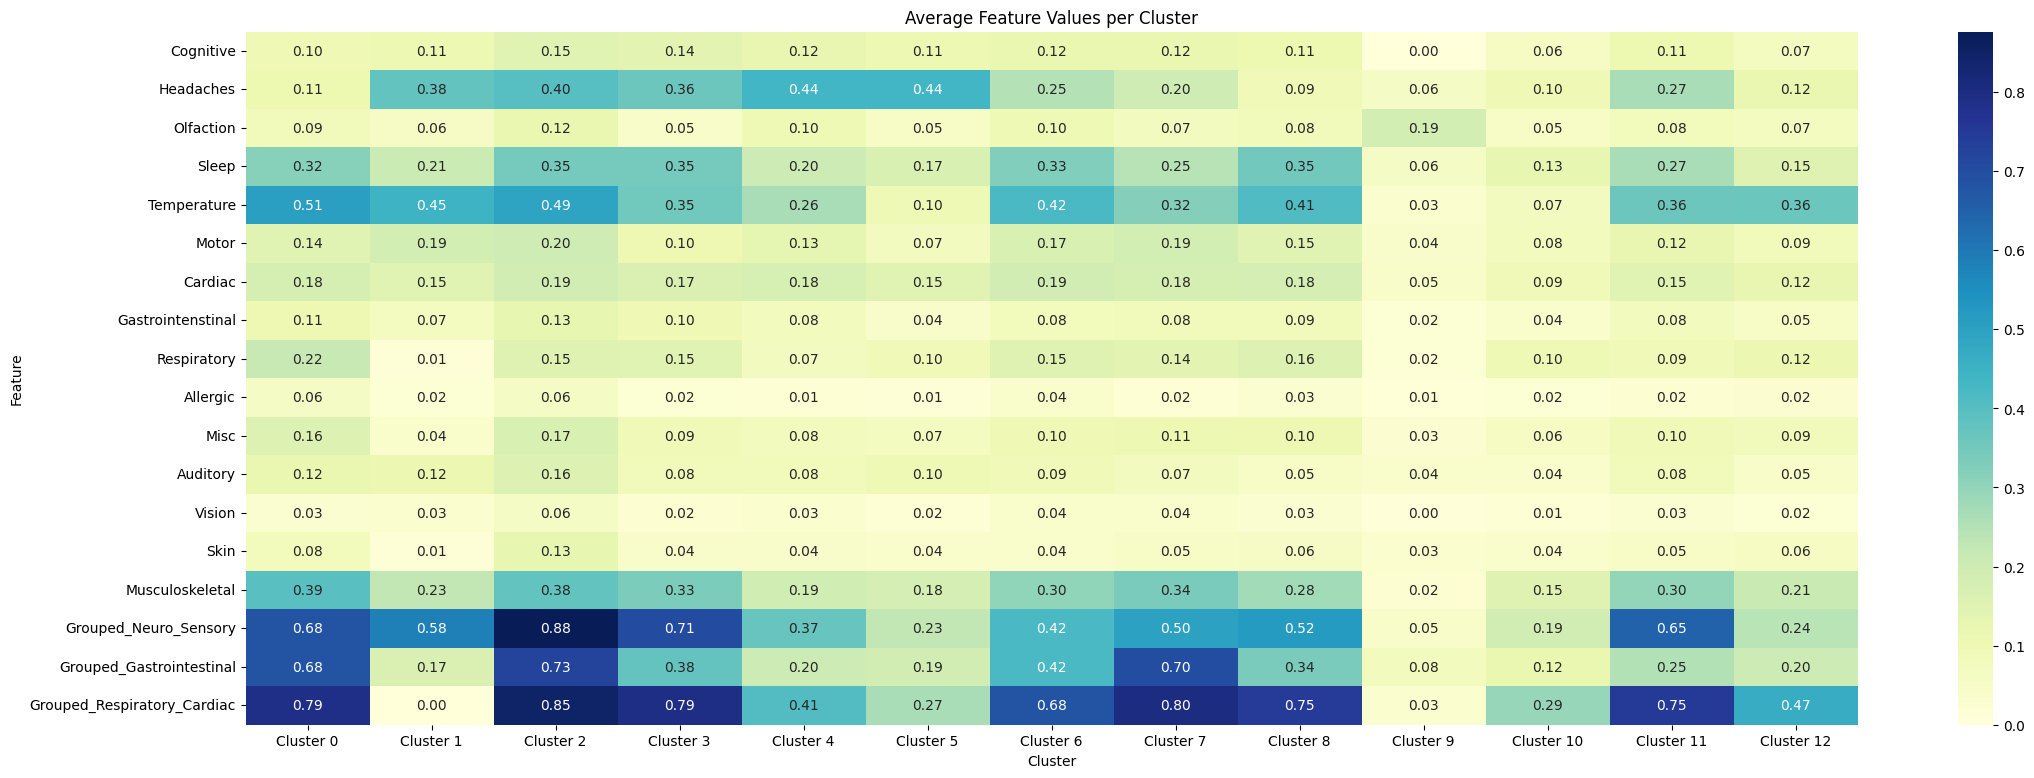

In [12]:
import seaborn as sns

def plot_cluster_averages(data, cluster_labels):
    """
    Compute and plot the average values of each column for each cluster with clusters on the x-axis,
    excluding the 'Cluster' column.

    :param data: Pandas DataFrame containing your dataset.
    :param cluster_labels: Array or list of cluster labels.
    """
    # Creating a new DataFrame to store averages
    cluster_averages = pd.DataFrame()

    # Calculate averages for each cluster
    for label in np.unique(cluster_labels):
        # Skip noise points
        if label == -1:
            continue
        # Exclude the 'Cluster' column
        cluster_data = data[data['cluster'] == label].drop('cluster', axis=1)
        cluster_avg = cluster_data.mean()
        cluster_averages[f'Cluster {label}'] = cluster_avg

    # Plotting the heatmap
    plt.figure(figsize=(len(cluster_averages.columns) * 2, len(cluster_averages.index) * 0.5))
    sns.heatmap(cluster_averages, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Average Feature Values per Cluster")
    plt.ylabel("Feature")
    plt.xlabel("Cluster")
    plt.show()

# Example usage of the function
plot_cluster_averages(dataset_aggregated, dataset_4_drop_corr['cluster'])

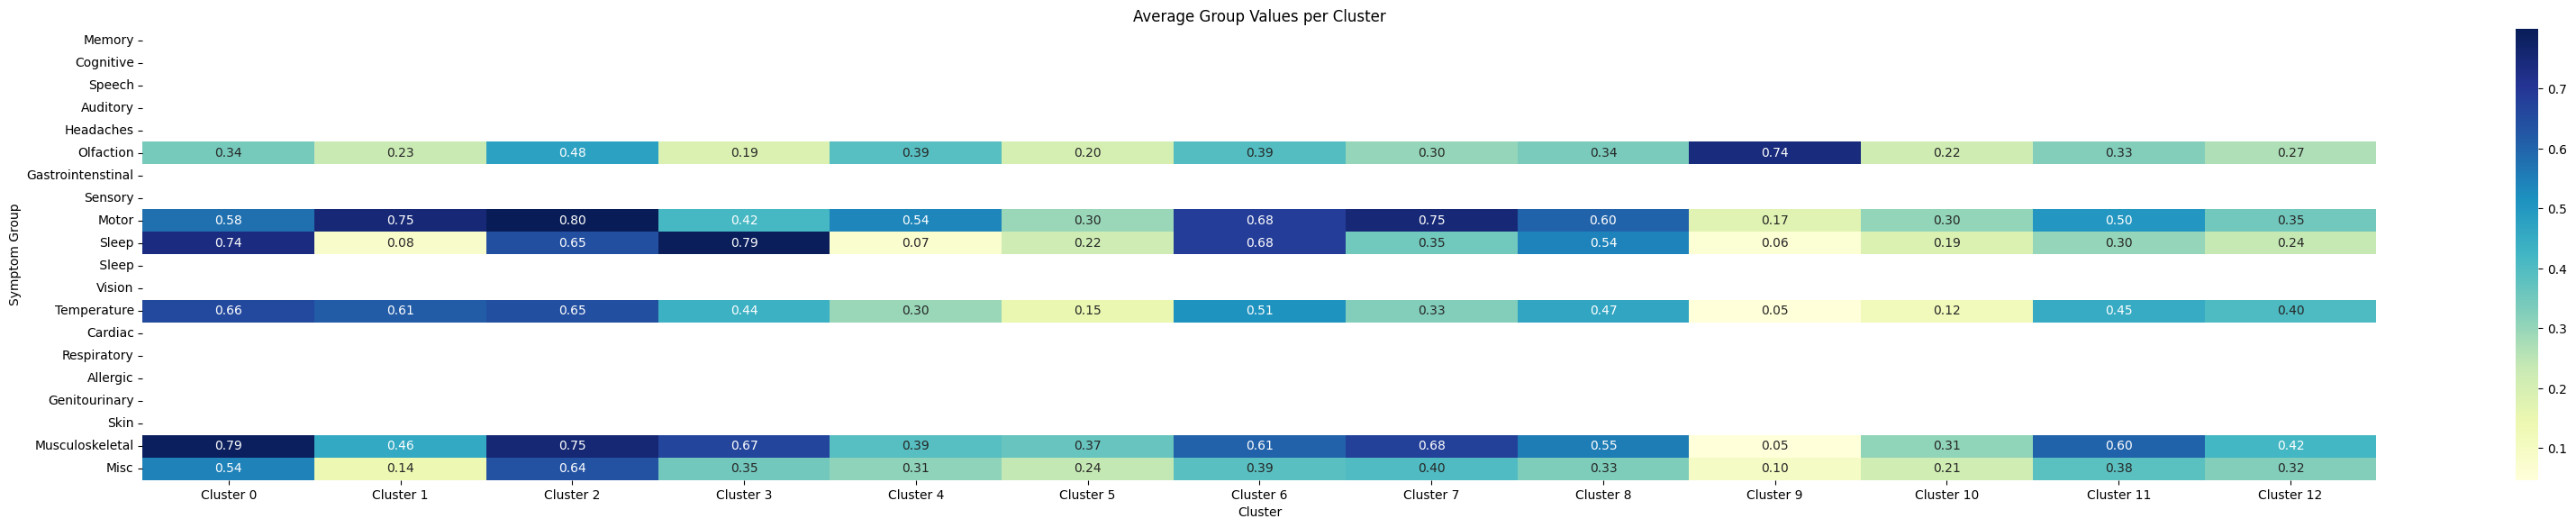

In [ ]:
import seaborn as sns

symptom_group_mapping = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/symptom_groups.csv')

import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_averages_grouped(data, cluster_labels, symptom_group_mapping):
    """
    Compute and plot the summed average values of each symptom group for each cluster,
    with the mapped groups on the y-axis and clusters on the x-axis.

    :param data: Pandas DataFrame containing your dataset.
    :param cluster_labels: Array or list of cluster labels.
    :param symptom_group_mapping: DataFrame containing symptom to group mappings.
    """
    # Create a mapping from symptom to group
    symptom_to_group = dict(zip(symptom_group_mapping['symptom'], symptom_group_mapping['group']))

    # Initialize a DataFrame to store group averages
    group_averages = {group: [] for group in symptom_group_mapping['group'].unique()}

    # Calculate averages for each cluster and sum for each group
    for label in np.unique(cluster_labels):
        if label == -1:  # Skip noise points
            continue
        cluster_data = data[data['cluster'] == label].drop('cluster', axis=1)

        for group in group_averages.keys():
            group_symptoms = [symptom for symptom, grp in symptom_to_group.items() if grp == group and symptom in cluster_data.columns]
            group_averages[group].append(cluster_data[group_symptoms].mean().mean())

    # Convert the group averages to a DataFrame
    group_averages_df = pd.DataFrame(group_averages, index=[f'Cluster {label}' for label in np.unique(cluster_labels) if label != -1])

    # Plotting the heatmap
    plt.figure(figsize=(len(group_averages_df.columns) * 2, len(group_averages_df.index) * 0.5))
    sns.heatmap(group_averages_df.T, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Average Group Values per Cluster")
    plt.ylabel("Symptom Group")
    plt.xlabel("Cluster")
    plt.show()

# Example usage of the function
plot_cluster_averages_grouped(dataset_4_drop_corr, dataset_4_drop_corr['cluster'], symptom_group_mapping)


In [ ]:
dataset_6 = pd.read_csv("/Users/leo/Programming/PLR/Leo/data/dataset_6.csv").drop(columns=["Unnamed: 0"])

In [ ]:
import pandas as pd

# Load the CSV file containing the new symptom-group mappings
symptom_group_mapping = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/symptom_groups.csv')


In [ ]:
# Create a mapping from symptom to group
symptom_to_group = dict(zip(symptom_group_mapping['symptom'], symptom_group_mapping['group']))

# Initialize a DataFrame to store the new grouped symptoms
new_grouped_symptoms = {group: [] for group in symptom_group_mapping['group'].unique()}

# Process each group
for symptom, group in symptom_to_group.items():
    if symptom in dataset_6.columns:  # Ensure the symptom exists in dataset_6
        # Check if the group column already exists, if not, initialize it
        if group not in dataset_6:
            dataset_6[group] = 0
        # Update the group column based on the constituent symptom
        dataset_6[group] = np.where(dataset_6[symptom] == 1, dataset_6[group] + 1, dataset_6[group])

# Apply the 75% threshold to determine the final value of the grouped symptoms
for group in new_grouped_symptoms.keys():
    if group in dataset_6.columns:
        num_symptoms = sum([1 for symptom in symptom_to_group if symptom_to_group[symptom] == group and symptom in dataset_6.columns])
        threshold = 0.6 * num_symptoms
        dataset_6[group] = np.where(dataset_6[group] >= threshold, 1, 0)

# Drop the original symptom features
for symptom in symptom_to_group.keys():
    if symptom in dataset_6.columns:
        dataset_6.drop(symptom, axis=1, inplace=True)
 


In [ ]:
#show all columns
pd.set_option('display.max_columns', None)

dataset_6

,Memory,Cognitive,Speech,Auditory,Headaches,Olfaction,Gastrointenstinal,Sensory,Motor,Sleep,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
6027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6028,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0
6029,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


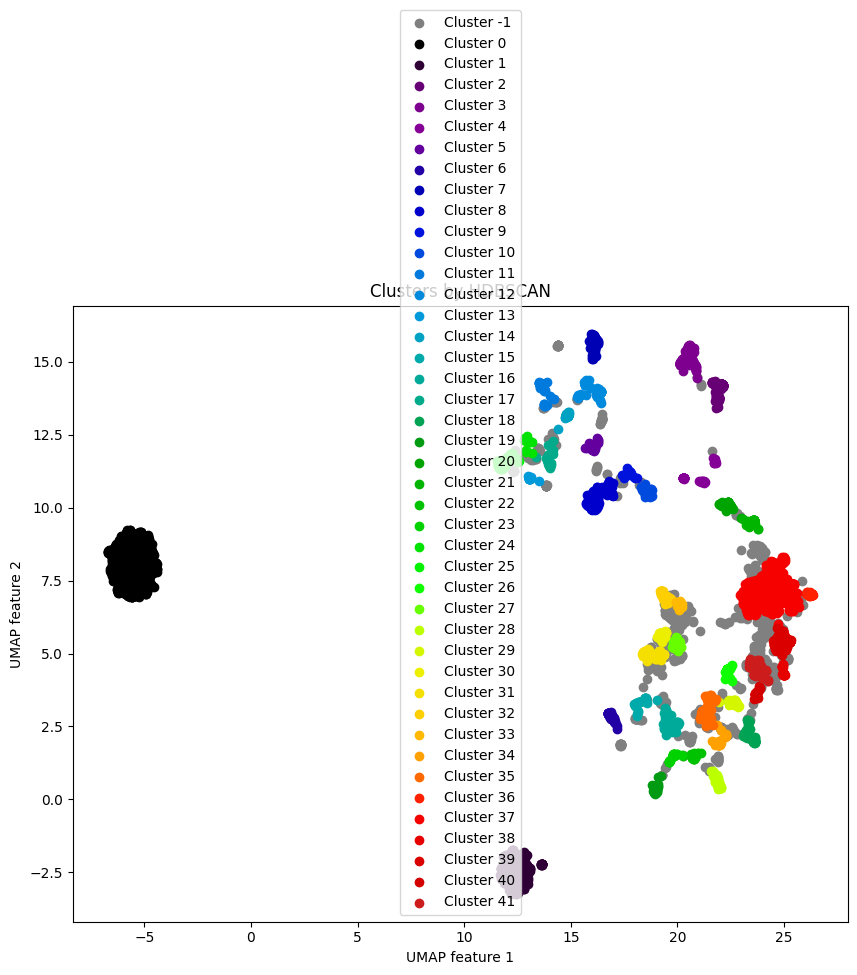

In [ ]:
import pandas as pd
import numpy as np
import umap
import hdbscan
import matplotlib.pyplot as plt

# Step 1: Load your data
# Replace this with your actual data loading method
# data = pd.read_csv('your_data.csv')

# Step 2: Apply UMAP
umap_model = umap.UMAP(random_state=42)
data_umap = umap_model.fit_transform(dataset_6)

# Step 3: Apply HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=30)
cluster_labels = clusterer.fit_predict(data_umap)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 8))
unique_labels = np.unique(cluster_labels)
for label in unique_labels:
    if label == -1:
        color = 'grey'  # Noise points in grey
    else:
        color = plt.cm.nipy_spectral(float(label) / len(unique_labels))
    plt.scatter(data_umap[cluster_labels == label, 0],
                data_umap[cluster_labels == label, 1],
                c=[color], label=f'Cluster {label}')
plt.title('Clusters by HDBSCAN')
plt.xlabel('UMAP feature 1')
plt.ylabel('UMAP feature 2')
plt.legend()
plt.show()

# Step 5: Save the cluster labels
# Replace this with your actual saving method
dataset_6['cluster'] = cluster_labels


In [ ]:
dataset_6

,Memory,Cognitive,Speech,Auditory,Headaches,Olfaction,Gastrointenstinal,Sensory,Motor,Sleep,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,25
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,16
6027,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
6028,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,37
6029,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11


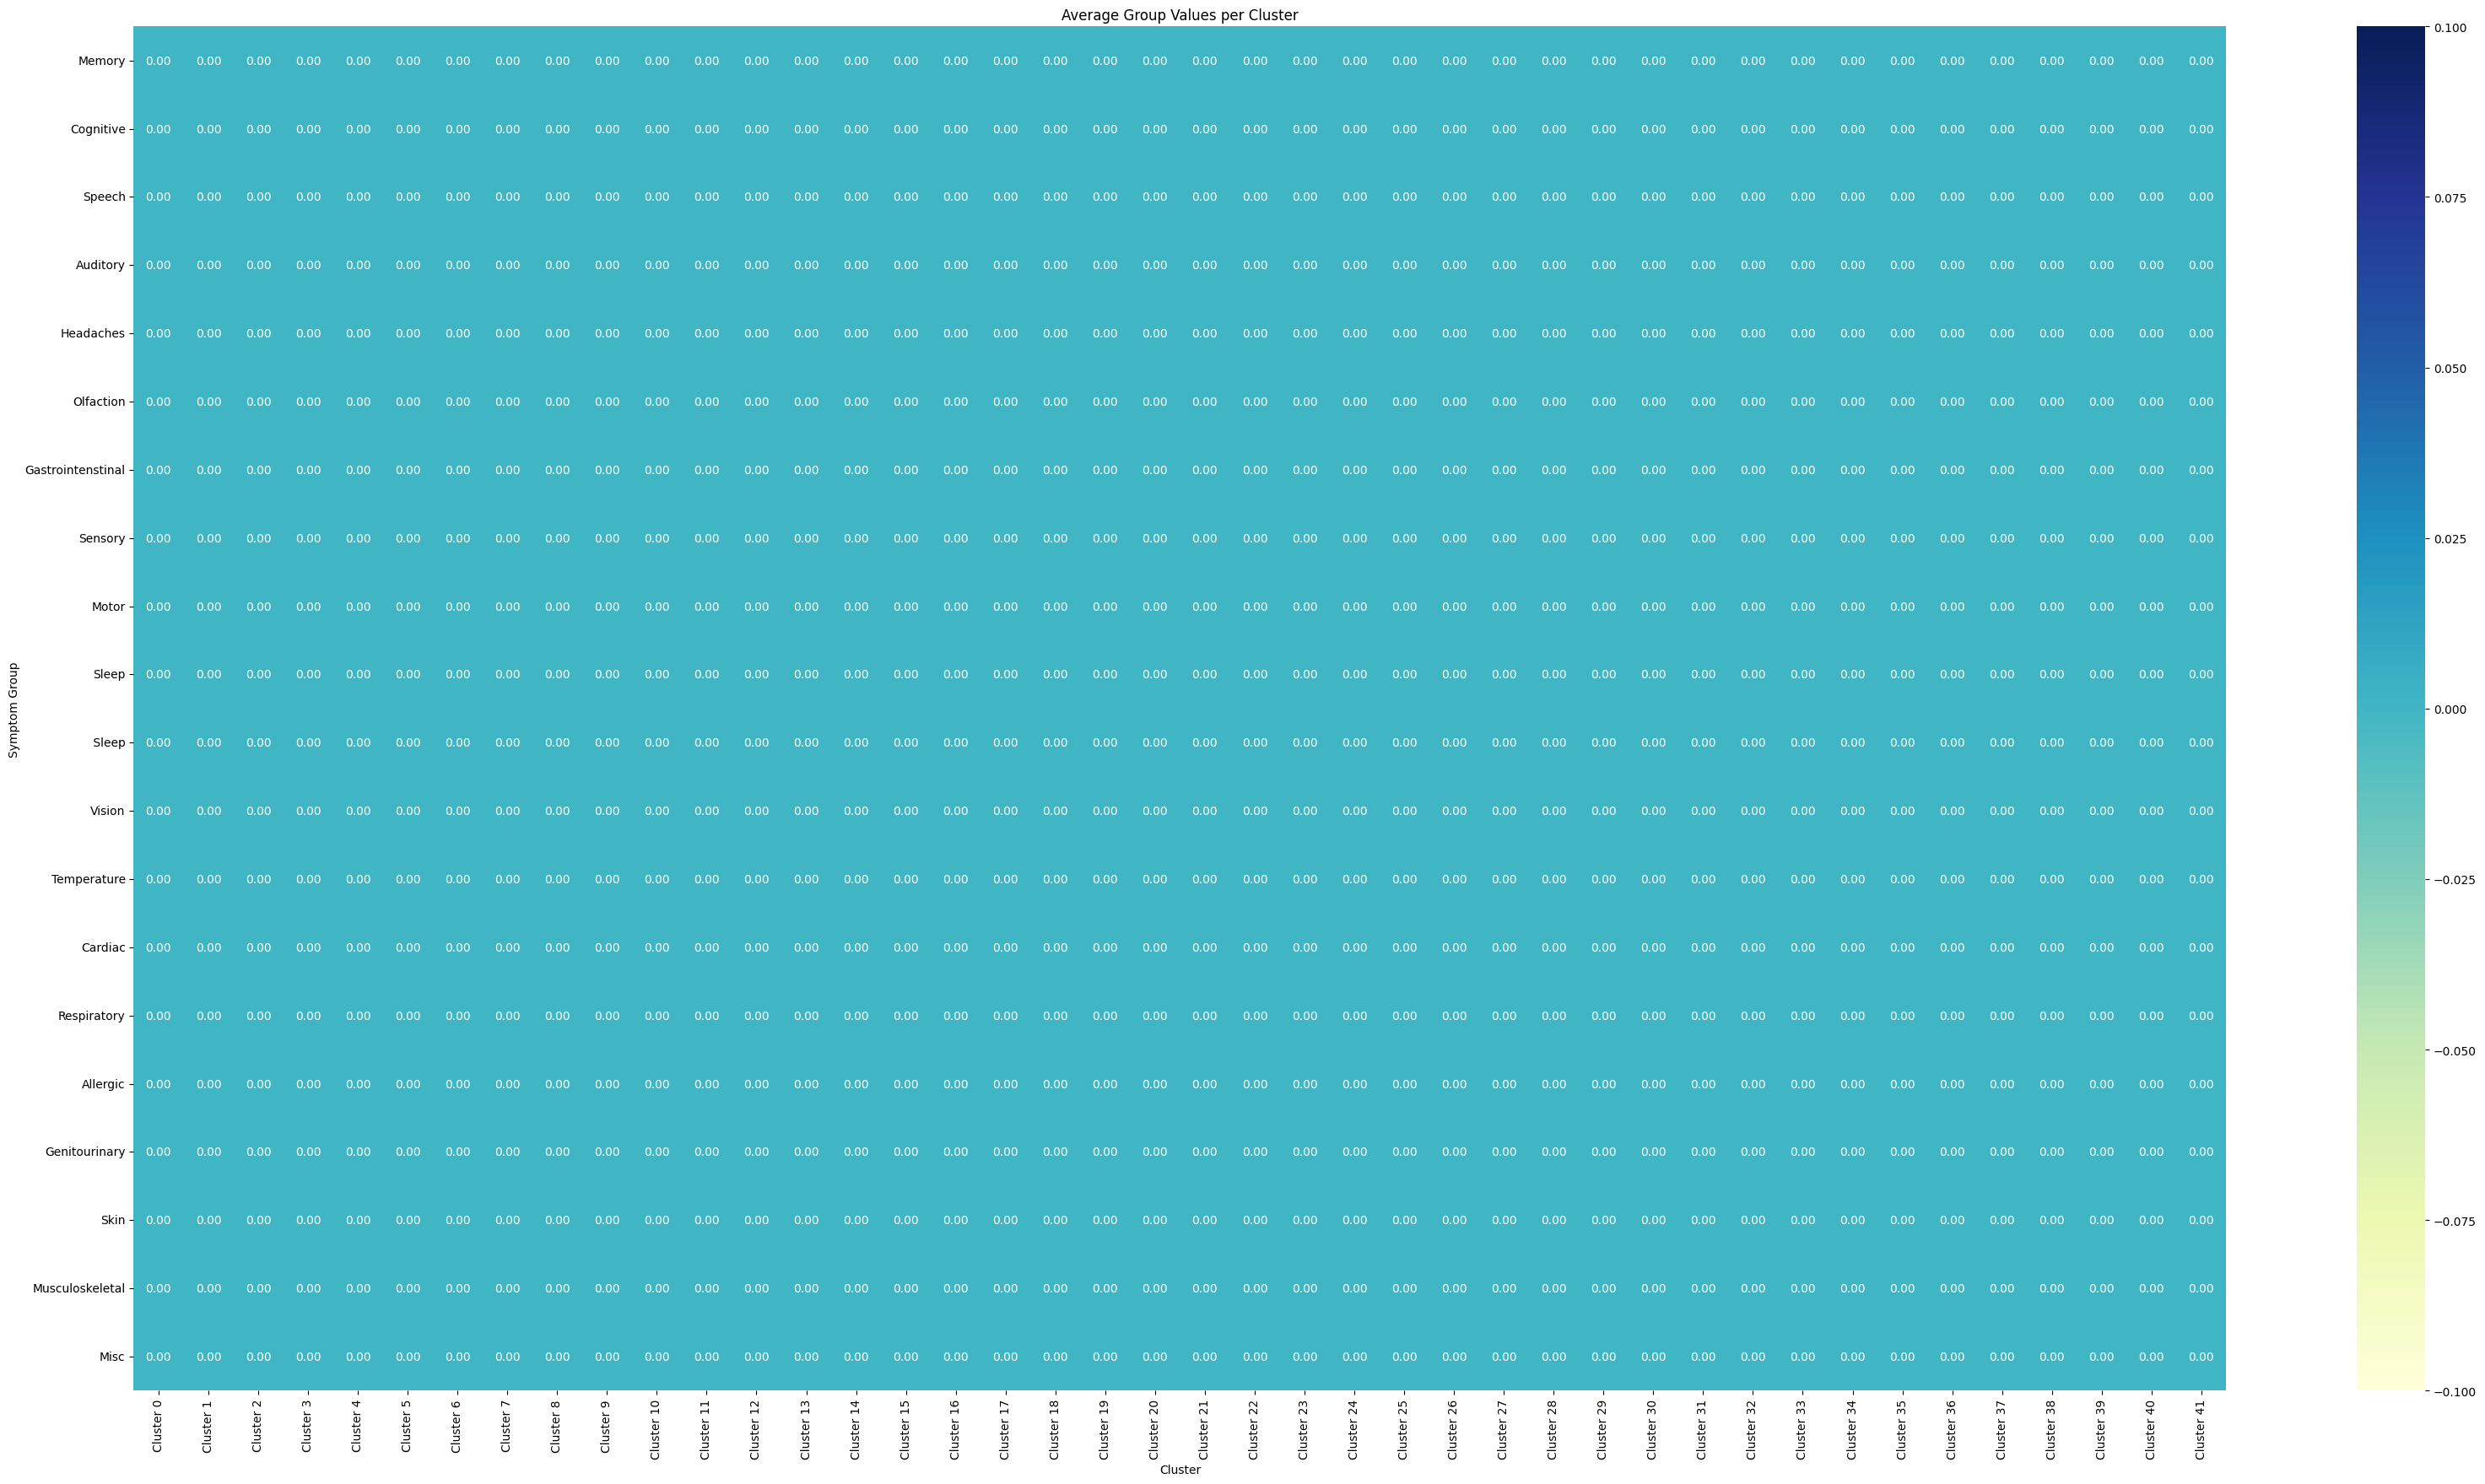

In [ ]:
import seaborn as sns

symptom_group_mapping = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/symptom_groups.csv')

import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_averages_grouped(data, cluster_labels, symptom_group_mapping):
    symptom_to_group = dict(zip(symptom_group_mapping['symptom'], symptom_group_mapping['group']))
    group_averages = {group: [] for group in symptom_group_mapping['group'].unique()}

    for label in np.unique(cluster_labels):
        if label == -1:  # Skip noise points
            continue
        cluster_data = data[data['cluster'] == label].drop('cluster', axis=1)

        for group in group_averages.keys():
            group_symptoms = [symptom for symptom, grp in symptom_to_group.items() if grp == group and symptom in cluster_data.columns]
            if group_symptoms:  # Check if there are any symptoms for the group
                group_averages[group].append(cluster_data[group_symptoms].mean().mean())
            else:
                group_averages[group].append(np.nan)  # Append NaN if no symptoms for the group

    group_averages_df = pd.DataFrame(group_averages, index=[f'Cluster {label}' for label in np.unique(cluster_labels) if label != -1])

    # Handle NaN values (e.g., fill with zero)
    group_averages_df.fillna(0, inplace=True)

    plt.figure(figsize=(len(group_averages_df.columns) * 2, len(group_averages_df.index) * 0.5))
    sns.heatmap(group_averages_df.T, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Average Group Values per Cluster")
    plt.ylabel("Symptom Group")
    plt.xlabel("Cluster")
    plt.show()

# Usage
plot_cluster_averages_grouped(dataset_6, dataset_6['cluster'], symptom_group_mapping)

